In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import scipy
from scipy import stats
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import copy



%load_ext autoreload
%autoreload 2


# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from itertools import combinations_with_replacement
from itertools import permutations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools
import figures as figures

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()



In [2]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)
# noLi2019 = merged_fitness[merged_fitness['source_publication']!='Li2019']

In [7]:
conditions = ['Fit1D-2%','Fit1D-5%',
              'Fit2D-2%','Fit2D-5%',
              'Fit3D-2%','Fit3D-5%',
              'Fit5D-2%','Fit5D-5%']

# replicates = [1,2,3]
replicates = {'Fit1D-2%':[1,2],
              'Fit1D-5%':[1,2],
              'Fit2D-2%':[1,2],
              'Fit2D-5%':[1,2],
              'Fit3D-2%':[1,2,3],
              'Fit3D-5%':[1,2,3],
              'Fit5D-2%':[1,2,3],
              'Fit5D-5%':[1,2,3]}

timepoints = {'Fit1D-2%':7,
              'Fit1D-5%':7,
              'Fit2D-2%':7,
              'Fit2D-5%':7,
              'Fit3D-2%':3,
              'Fit3D-5%':3,
              'Fit5D-2%':3,
              'Fit5D-5%':3}

In [10]:
frac_adaptive_reps = {'Fit1D-2%_R1':[0.01679654,0.03877816,0.0990744,0.18502084,0.32561373,0.50026468
,0.69720261],
'Fit1D-2%_R2':[0.01679654,0.03859004,0.08290013,0.18620736,0.31844365,0.50774083
,0.69366423],
'Fit1D-5%_R1':[0.04097484,0.08988761,0.1991138,0.34681058,0.53028763,0.70083547
,0.83061269],
'Fit1D-5%_R2':[0.04097484,0.0880502,0.17334594,0.33556184,0.52362674,0.69669833
,0.83889647],
'Fit2D-2%_R1':[0.01668408,0.0982661,0.30497456,0.5236933,0.74382209,0.9023462
,0.95886954],
'Fit2D-2%_R2':[0.01668408,0.10184081,0.28765664,0.49013391,0.72125725,0.8753872
,0.9484072,],
'Fit2D-5%_R1':[0.04208657,0.20414912,0.42310295,0.58388309,0.78180444,0.90293329
,0.95946741],
'Fit2D-5%_R2':[0.04208657,0.21964882,0.43290299,0.64120282,0.82724961,0.93431873
,0.97410066],
'Fit3D-2%_R1':[0.018308,0.09202843,0.17297361],
'Fit3D-2%_R2':[0.018308,0.09726202,0.2250882],
'Fit3D-2%_R3':[0.018308,0.10310157,0.19714161],
'Fit3D-5%_R1':[0.0446738,0.10359838,0.24730583],
'Fit3D-5%_R2':[0.0446738,0.12810736,0.19830512],
'Fit3D-5%_R3':[0.0446738,0.1097519,0.228535],
'Fit5D-2%_R1':[0.02352938,0.08874431,0.17179893],
'Fit5D-2%_R2':[0.02352938,0.08752374,0.14778216],
'Fit5D-2%_R3':[0.02352938,0.10128654,0.16266239],
'Fit5D-5%_R1':[0.05331967,0.13788072,0.23298771],
'Fit5D-5%_R2':[0.05331967,0.14633287,0.31351367],
'Fit5D-5%_R3':[0.05331967,0.1387983,0.56573556]}

frac_adaptive = {}
for condition in ['Fit1D-2%','Fit1D-5%',
                  'Fit2D-2%','Fit2D-5%',
                  'Fit3D-2%','Fit3D-5%',
                  'Fit5D-2%','Fit5D-5%']:
    fracs = []
    for rep in replicates[condition]:
        fracs.append(frac_adaptive_reps[f'{condition}_R{rep}'])
    frac_adaptive[condition] = np.mean(fracs,axis=0)

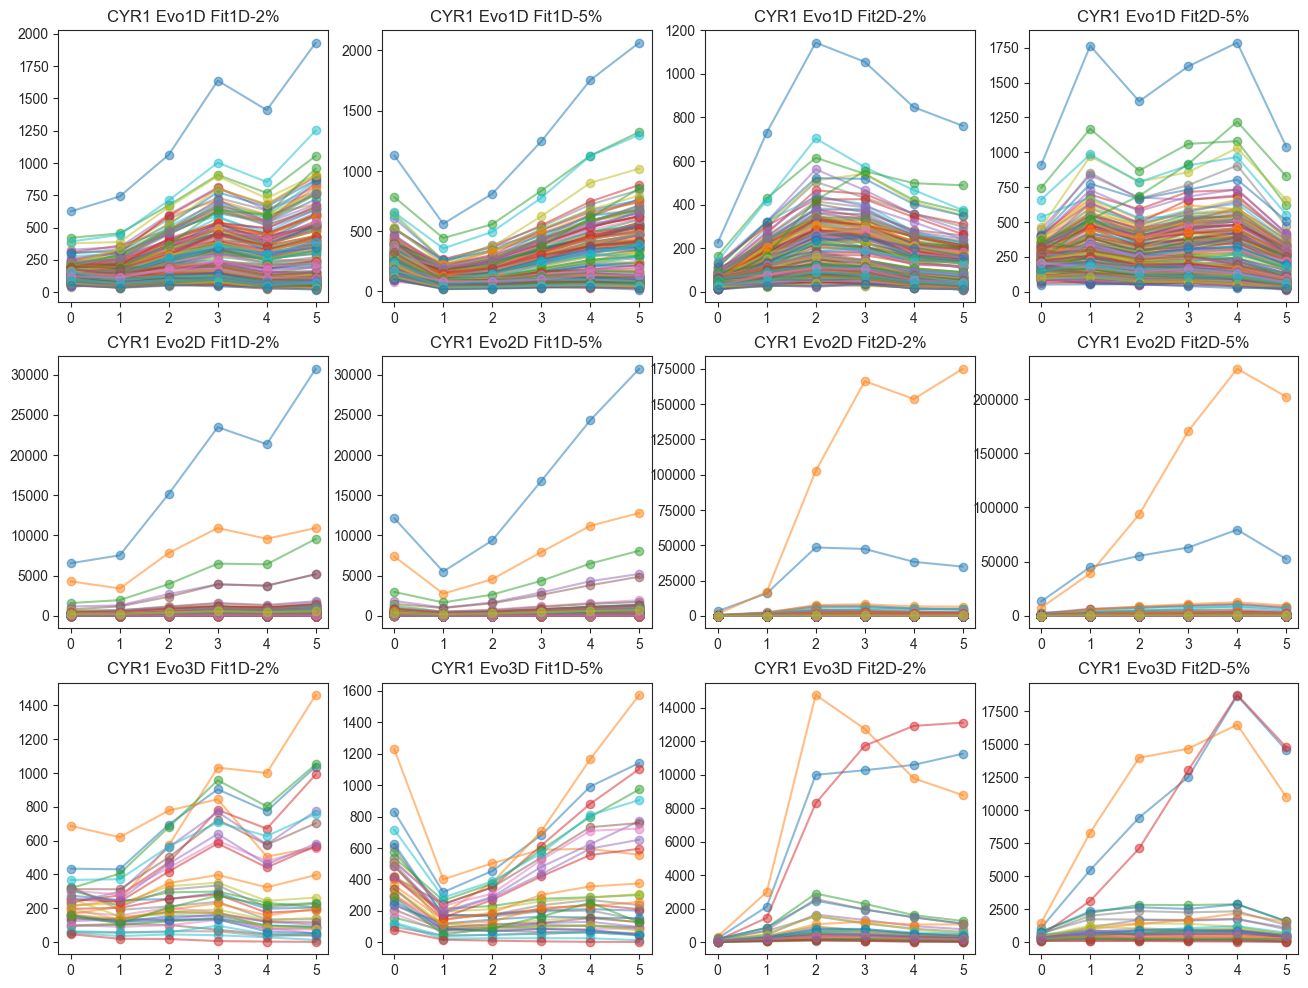

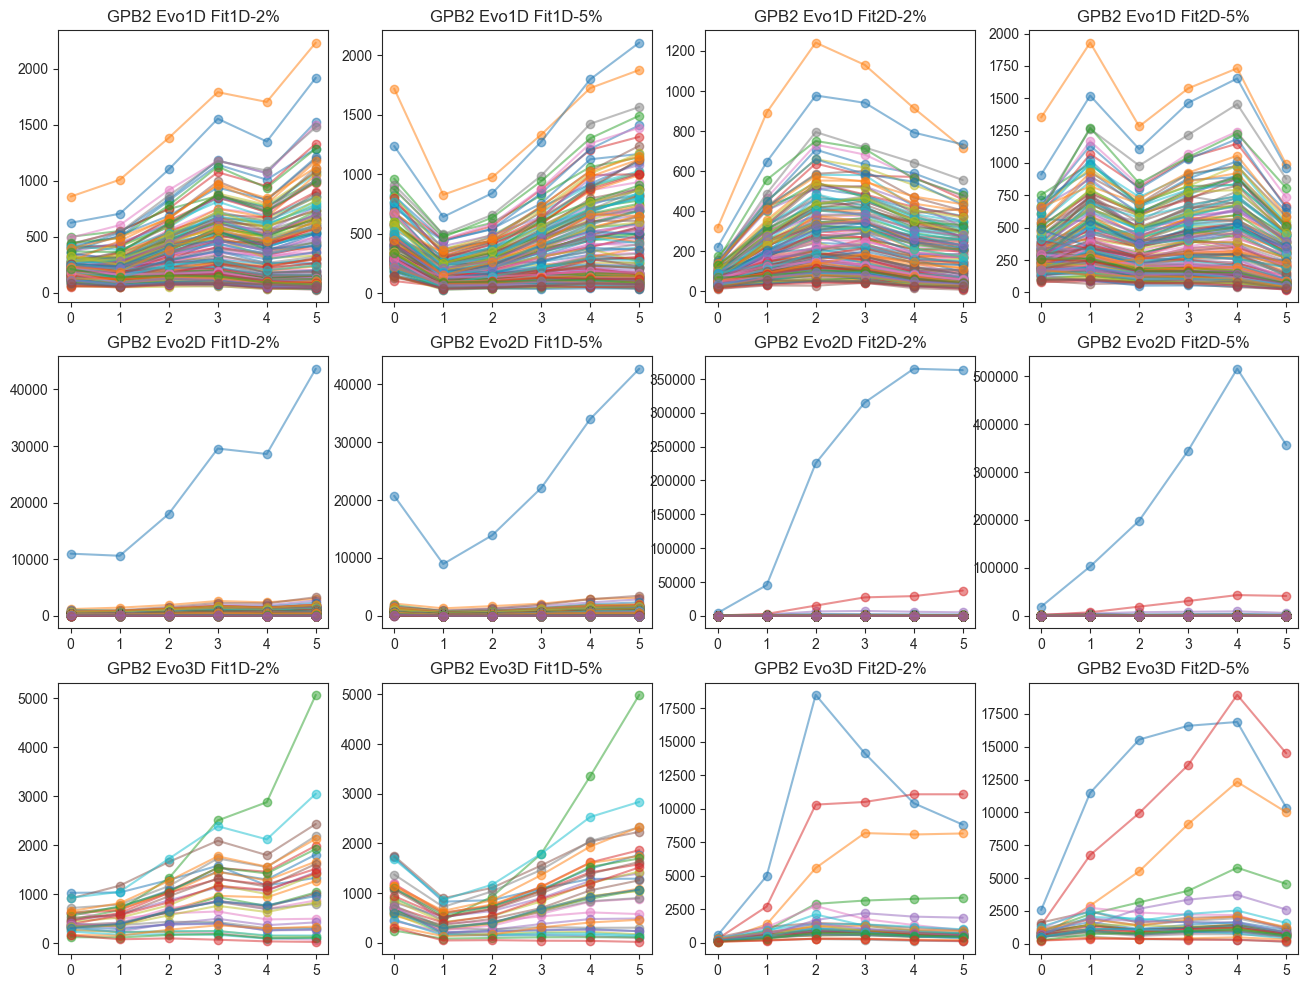

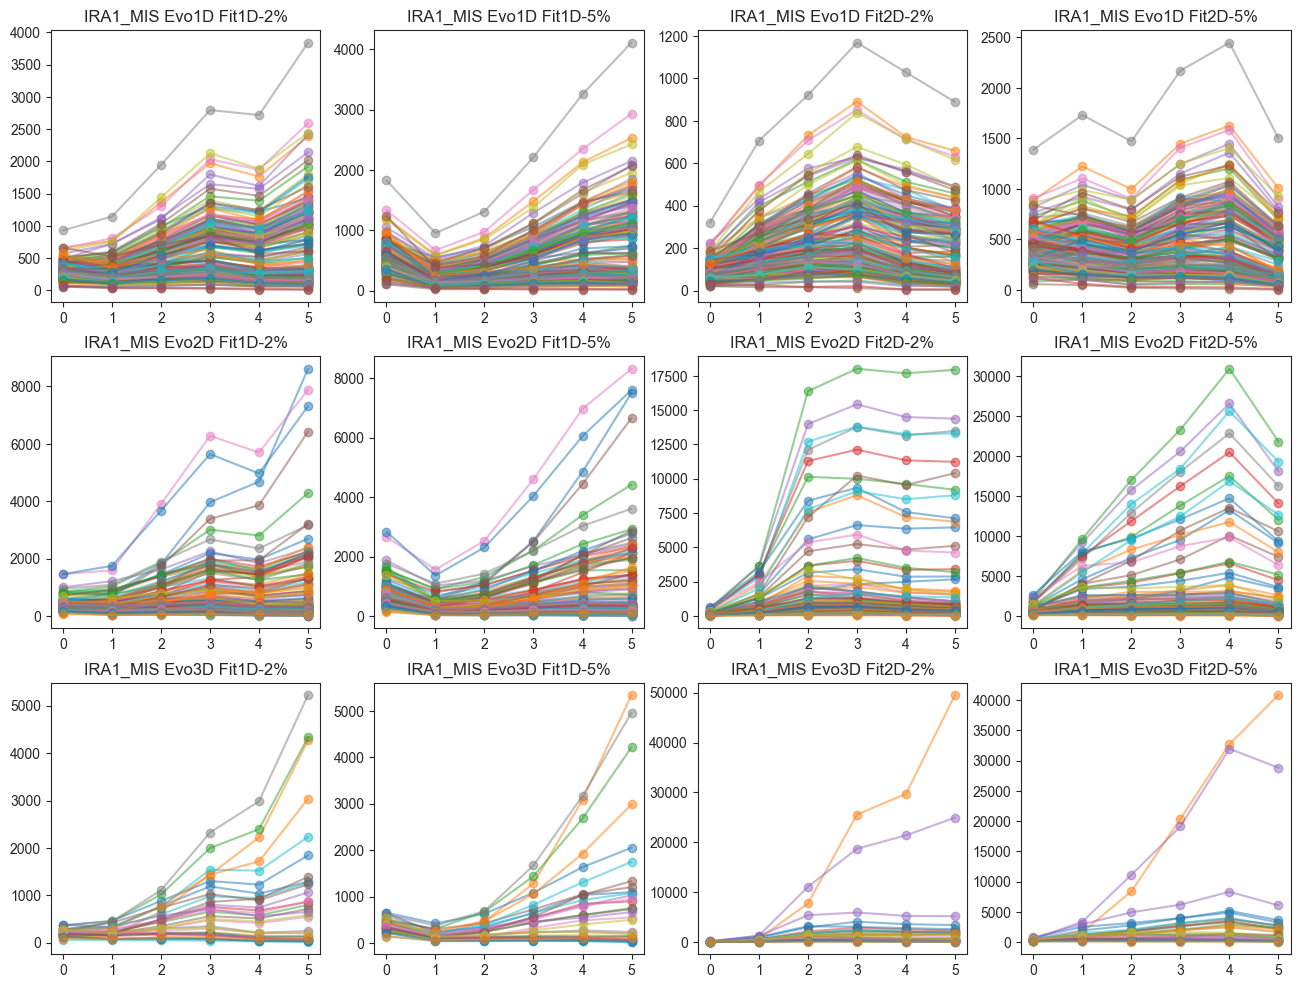

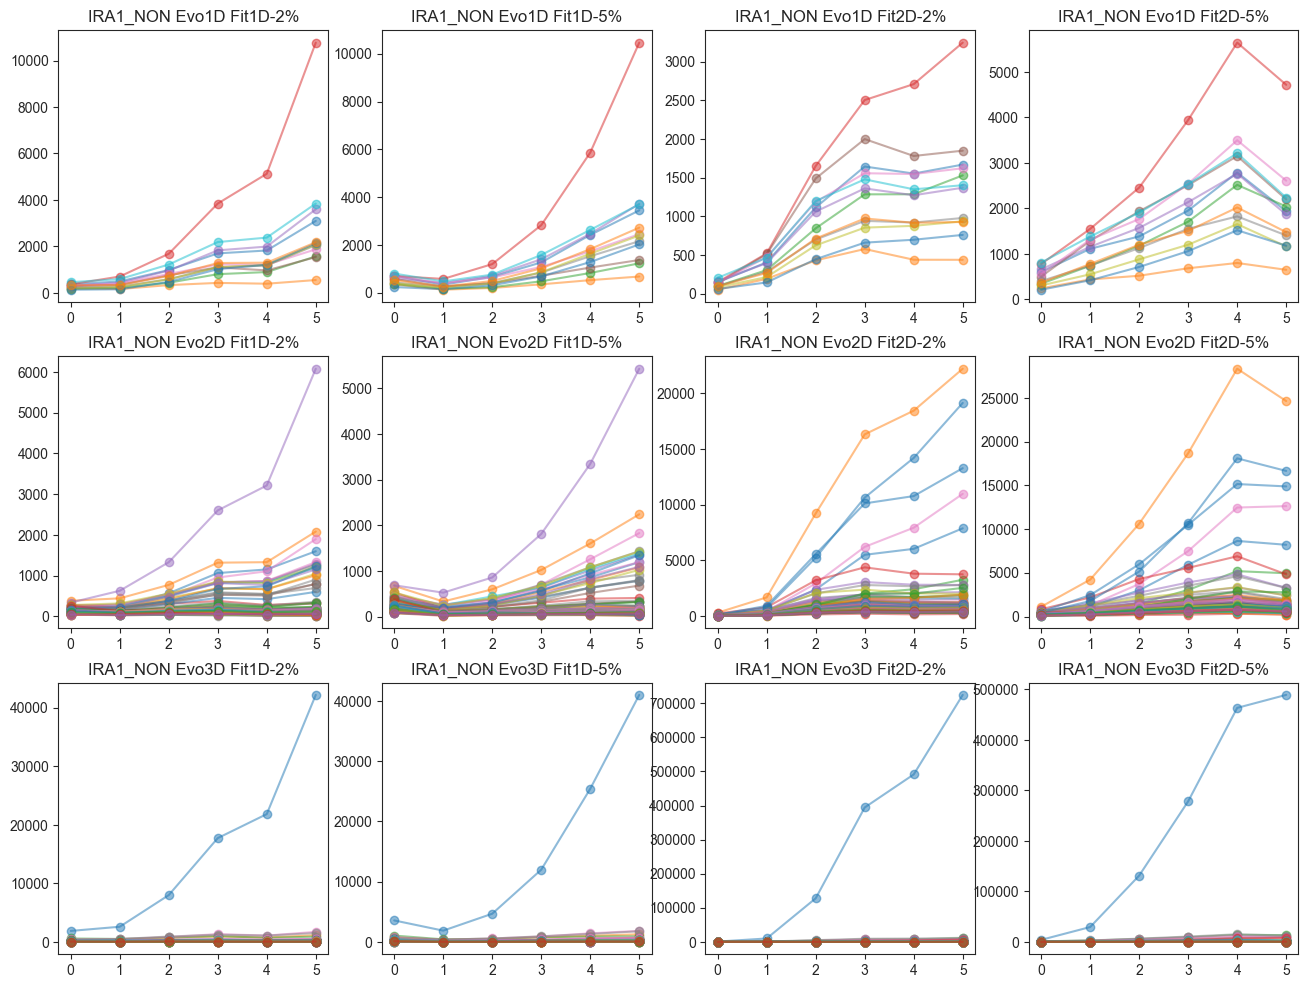

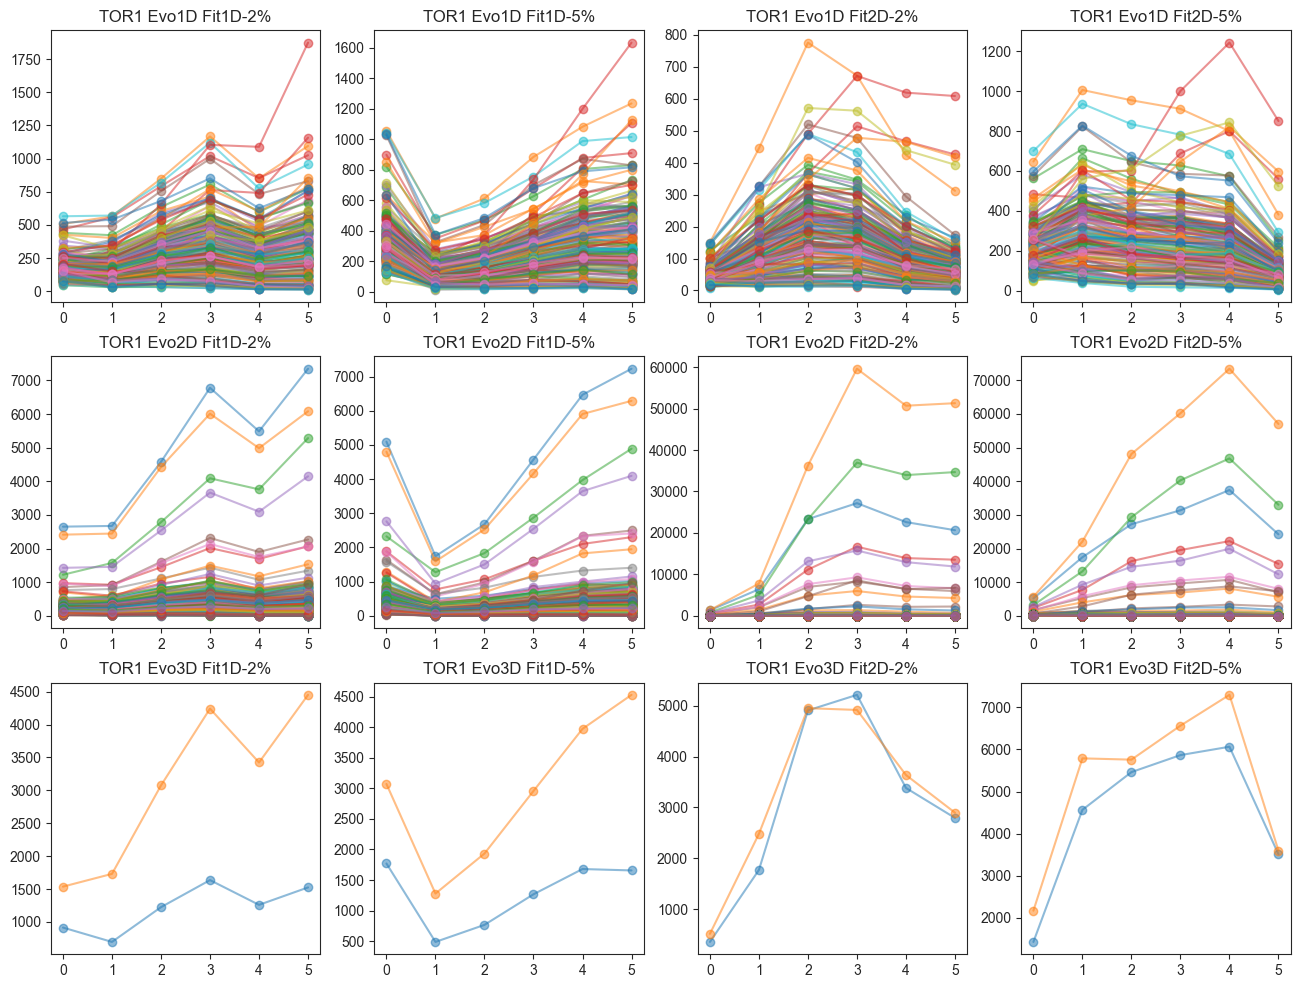

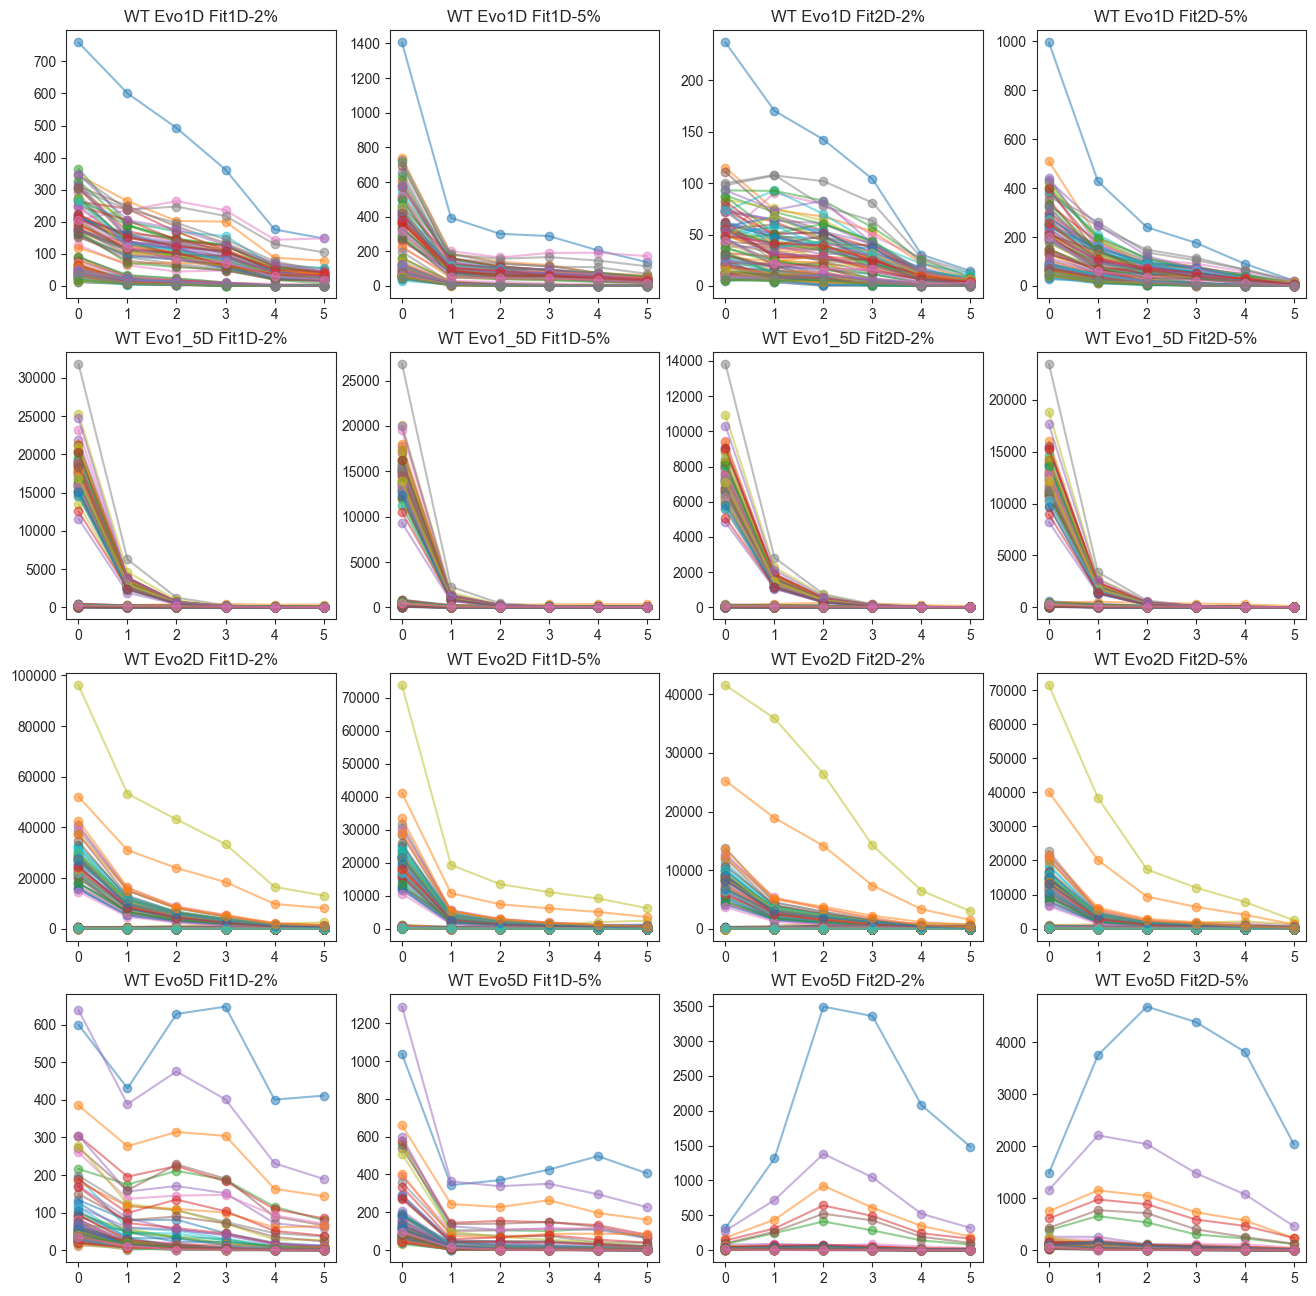

In [16]:
evo_colors = {'Evo1D':'b',
              'Evo2D':'r',
              'Evo3D':'g',
              'Evo5D':'m',
              'unknown':'gray',
             }


# conditions = ['Fit1D_both2%5%','Fit2D_both2%5%','Fit3D_both2%5%','Fit5D_both2%5%']
replicates 

these_conditions = ['Fit1D-2%','Fit1D-5%','Fit2D-2%','Fit2D-5%']
for anc in np.unique(merged_fitness['ancestor'].values):
    this_anc = merged_fitness[merged_fitness['ancestor']==anc]
    plt.figure(figsize=(len(these_conditions)*4,4*len(np.unique(this_anc['evolution_condition'].values))))
    for e,evo_cond in enumerate(np.unique(this_anc['evolution_condition'].values)):
        
        this_anc_indices = np.where((merged_fitness['ancestor']==anc)&(merged_fitness['evolution_condition']==evo_cond))[0]


        for c,condition in enumerate(these_conditions):

            plt.subplot(len(np.unique(this_anc['evolution_condition'].values)),4,e*4+c+1)
            plt.title(f'{anc} {evo_cond} {condition}')
            
            
            rep = replicates[condition][0]
            these_fs = [f'{condition}-T0'] + [f'{condition}-R{rep}-T{timepoint}' for timepoint in range(1,timepoints[condition]-1)]
            these_es = [f+'_error' for f in these_fs]
            
            avg_time_fitness = merged_fitness[these_fs].values
#             avg_time_error = 
            
            for rep in replicates[condition][1:]:
                these_fs = [f'{condition}-T0'] + [f'{condition}-R{rep}-T{timepoint}' for timepoint in range(1,timepoints[condition]-1)]
                these_es = [f+'_error' for f in these_fs]
                avg_time_fitness += merged_fitness[these_fs].values
            avg_time_fitness = avg_time_fitness/len(replicates[condition])
                
            plt.plot(avg_time_fitness[this_anc_indices,:].swapaxes(0,1),marker='o',alpha=0.5)


            
#             for rep in replicates[condition]:
#                 plt.subplot(len(np.unique(this_anc['evolution_condition'].values)),8,e*8+c*2+rep)
#                 plt.title(f'{anc} {evo_cond} {condition} R{rep}')
#                 these_fs = [f'{condition}_R{rep}_T{timepoint}' for timepoint in range(timepoints[condition]-1)]

#                 t0_repeated = np.repeat(time_fitness[these_fs].values[:,0],timepoints[condition]-1).reshape(time_fitness[these_fs].shape)
#                 delta_0 = time_fitness[these_fs].values-t0_repeated
#     #             plt.plot(delta_0[this_anc_indices,:])

#                 plt.plot(time_fitness[these_fs].values[this_anc_indices,:].swapaxes(0,1),marker='o',alpha=0.5)

#     plt.savefig(f'plots/{anc}_time_fitness_avgcondition.pdf',bbox_inches='tight')




In [13]:
list(merged_fitness.columns)

['Fit1D-2%-R1_fitness',
 'Fit1D-2%-R1_error',
 'Fit1D-2%-R2_fitness',
 'Fit1D-2%-R2_error',
 'Fit1D-5%-R1_fitness',
 'Fit1D-5%-R1_error',
 'Fit1D-5%-R2_fitness',
 'Fit1D-5%-R2_error',
 'Fit2D-2%-R1_fitness',
 'Fit2D-2%-R1_error',
 'Fit2D-2%-R2_fitness',
 'Fit2D-2%-R2_error',
 'Fit2D-5%-R1_fitness',
 'Fit2D-5%-R1_error',
 'Fit2D-5%-R2_fitness',
 'Fit2D-5%-R2_error',
 'Fit3D-2%-R1_fitness',
 'Fit3D-2%-R1_error',
 'Fit3D-2%-R2_fitness',
 'Fit3D-2%-R2_error',
 'Fit3D-2%-R3_fitness',
 'Fit3D-2%-R3_error',
 'Fit3D-5%-R1_fitness',
 'Fit3D-5%-R1_error',
 'Fit3D-5%-R2_fitness',
 'Fit3D-5%-R2_error',
 'Fit3D-5%-R3_fitness',
 'Fit3D-5%-R3_error',
 'Fit5D-2%-R1_fitness',
 'Fit5D-2%-R1_error',
 'Fit5D-2%-R2_fitness',
 'Fit5D-2%-R2_error',
 'Fit5D-2%-R3_fitness',
 'Fit5D-2%-R3_error',
 'Fit5D-5%-R1_fitness',
 'Fit5D-5%-R1_error',
 'Fit5D-5%-R2_fitness',
 'Fit5D-5%-R2_error',
 'Fit5D-5%-R3_fitness',
 'Fit5D-5%-R3_error',
 'BCID',
 'Fit1D-5%-R1-T2',
 'Fit5D-2%-R2-T2-PCRb',
 'Fit1D-2%-R1-T4',
 'Fit5D-2

In [17]:
# merged_fitness['Fit2D-5%-R2-T1']

0         5711
1       133024
2         6744
3         1272
4         2592
         ...  
5019       548
5020       172
5022       454
5023        92
5024       247
Name: Fit2D-5%-R2-T1, Length: 4633, dtype: int64